<a href="https://colab.research.google.com/github/222010303005/BharatIntern_Internship/blob/main/Superstore_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Forecasting the sales of a supermarket**

I)Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

II)Importing the dataset

In [5]:
df=pd.read_csv("train.csv")


III)Displaying the dataset

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9790,9791,CA-2018-144491,27-03-2018,01-04-2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.246
9791,9792,CA-2015-127166,21-05-2015,23-05-2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064
9792,9793,CA-2015-127166,21-05-2015,23-05-2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.772
9793,9794,CA-2015-127166,21-05-2015,23-05-2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832
9794,9795,CA-2015-127166,21-05-2015,23-05-2015,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240
9795,9796,CA-2017-125920,21-05-2017,28-05-2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [12]:
df[df["Postal Code"].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05-12-2018,10-12-2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07-11-2016,09-11-2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06-04-2017,10-04-2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23-01-2017,27-01-2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23-01-2017,27-01-2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23-01-2017,27-01-2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


To check if there are any more missing values

<Axes: >

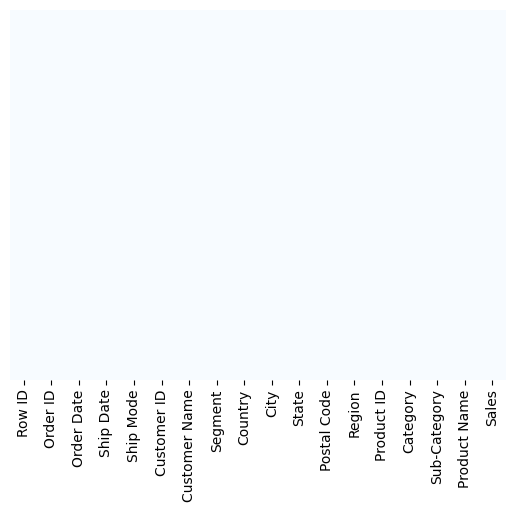

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [14]:
df["Order Date"] = pd.DatetimeIndex(df["Order Date"])
df["Ship Date"] = pd.DatetimeIndex(df["Ship Date"])

<ipython-input-14-dbd653d1b559>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Order Date"] = pd.DatetimeIndex(df["Order Date"])
<ipython-input-14-dbd653d1b559>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Ship Date"] = pd.DatetimeIndex(df["Ship Date"])


In [16]:
num_cols = ['Sales']
df[num_cols].describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


Checking non numeric columns

In [18]:
str_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category']
for col in str_cols:
    print(df[col].nunique())
    print(df[col].unique())

4
['Second Class' 'Standard Class' 'First Class' 'Same Day']
3
['Consumer' 'Corporate' 'Home Office']
1
['United States']
529
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'I

In [19]:
print(df['Order Date'].min())
print(df['Order Date'].max())
print(df['Ship Date'].min())
print(df['Ship Date'].max())

2015-01-02 00:00:00
2018-12-30 00:00:00
2015-01-04 00:00:00
2019-05-01 00:00:00


Therefore the latest Shipment of the Store took on 01st May 2019 and The latest order was placed on 30th December 2018 by which we can say that there can be a 5 month minimum gap for your order to be processed and shipped

Sales Analysis with every other metric present in the dataset

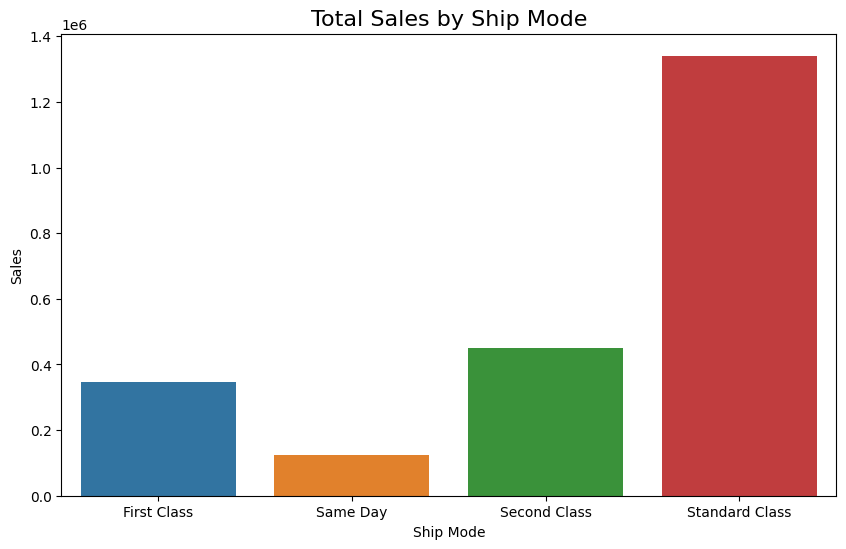

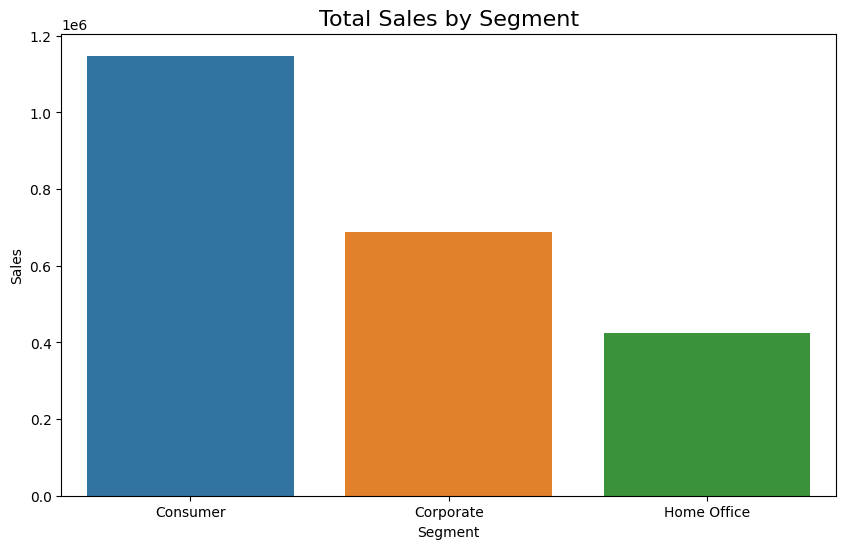

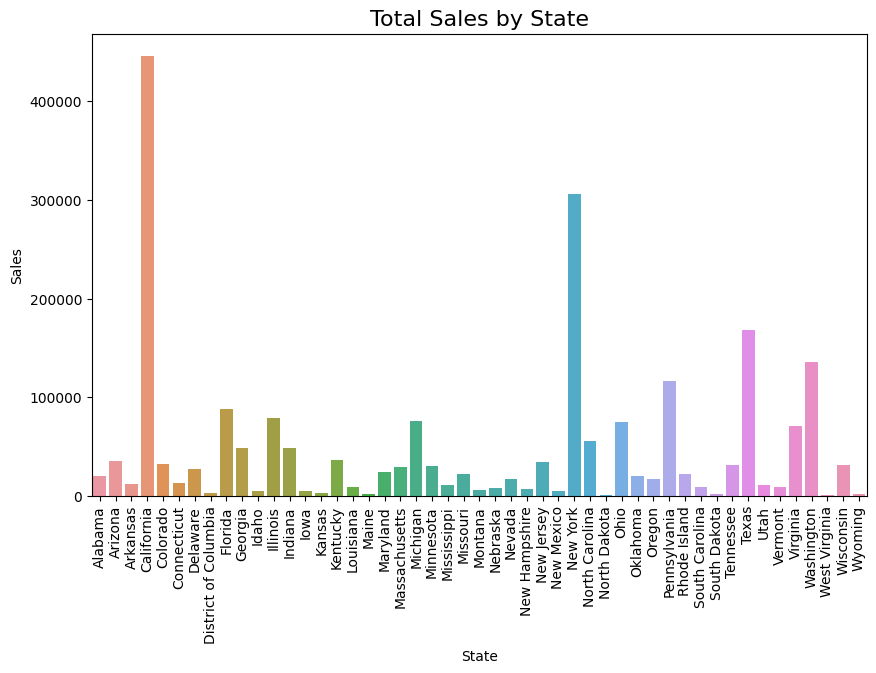

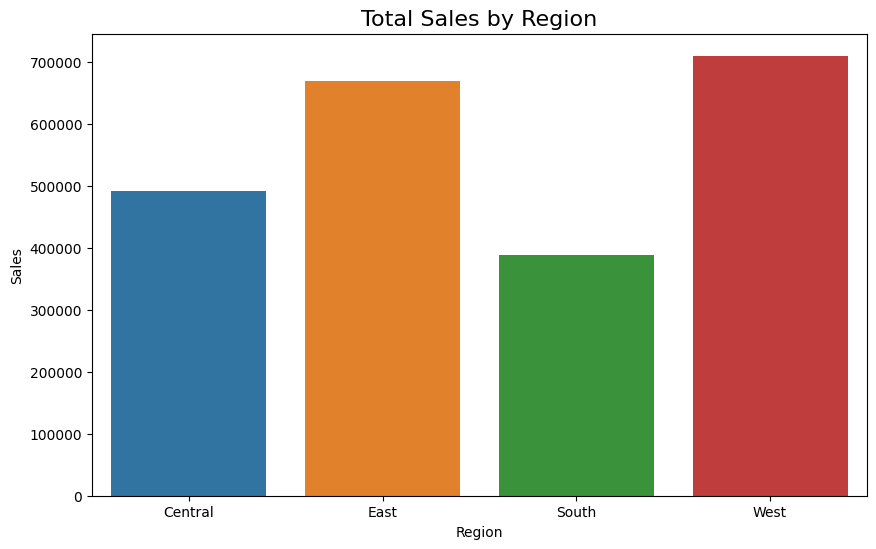

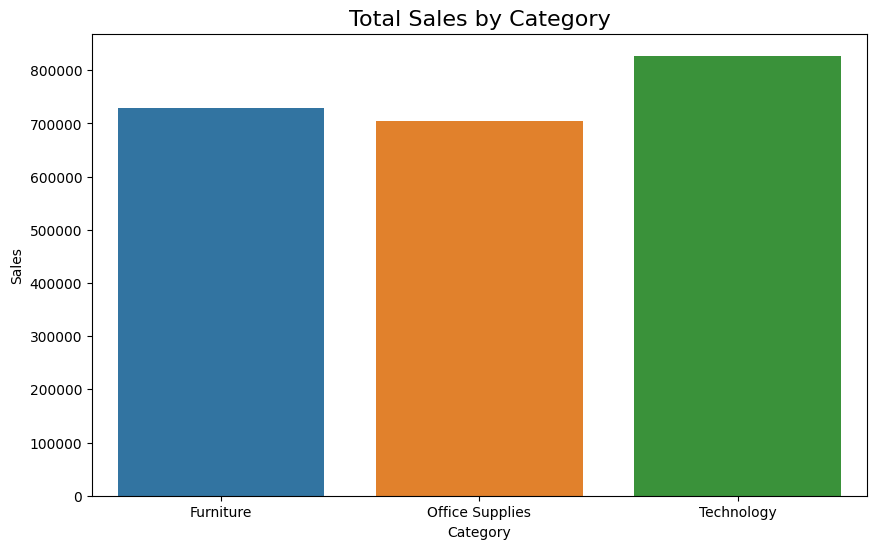

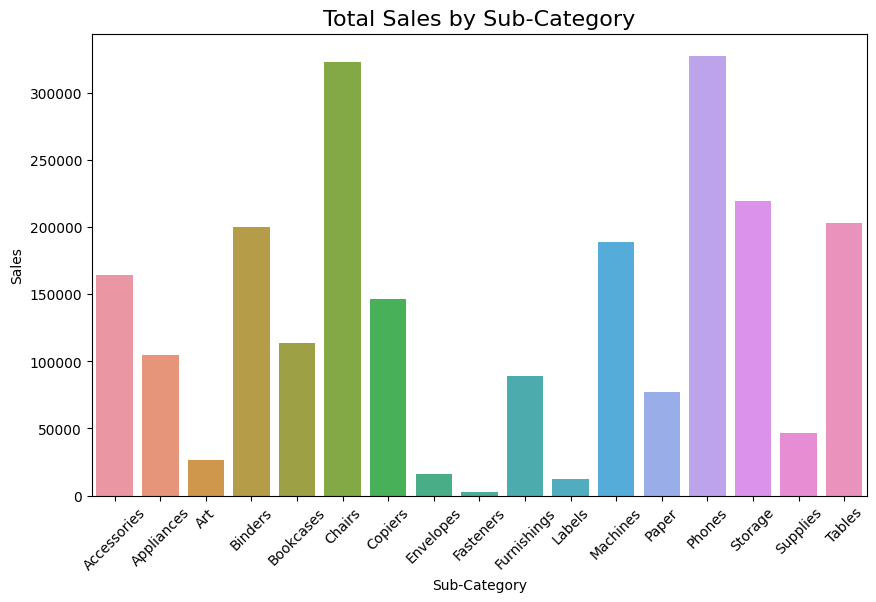

In [20]:
grouping_cols = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']
for col in grouping_cols:
    data = df.groupby(col)['Sales'].sum().reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(data=data, x=col, y='Sales')
    if col == 'State': plt.xticks(rotation=90)
    if col == 'Sub-Category': plt.xticks(rotation=45)
    plt.title('Total Sales by ' + col, fontsize=16)
    plt.show()

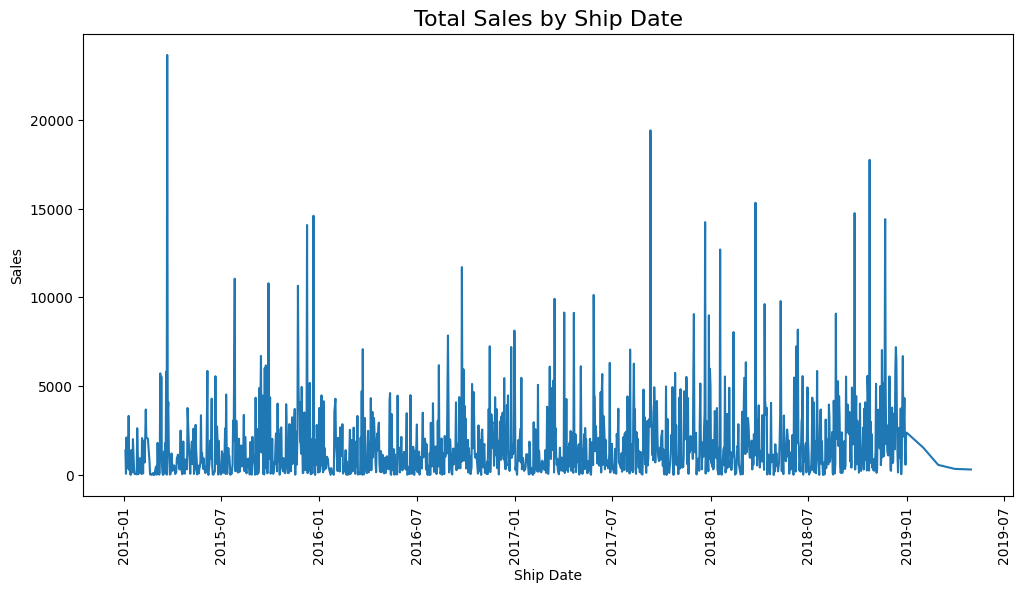

In [22]:
#By calculating in period
data = df.groupby('Ship Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Ship Date', y='Sales')
plt.xticks(rotation=90)
plt.title('Total Sales by ' + 'Ship Date', fontsize=16)
plt.show()

In [26]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

<Axes: ylabel='Segment'>

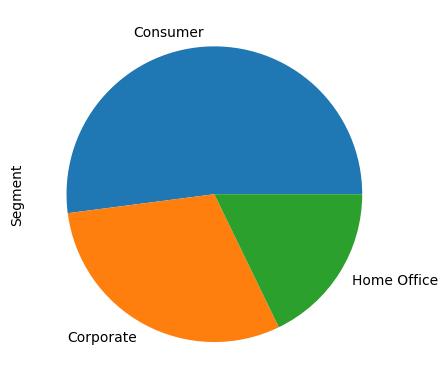

In [24]:
df['Segment'].value_counts().plot.pie()

Text(0.5, 1.0, 'Ship Mode')

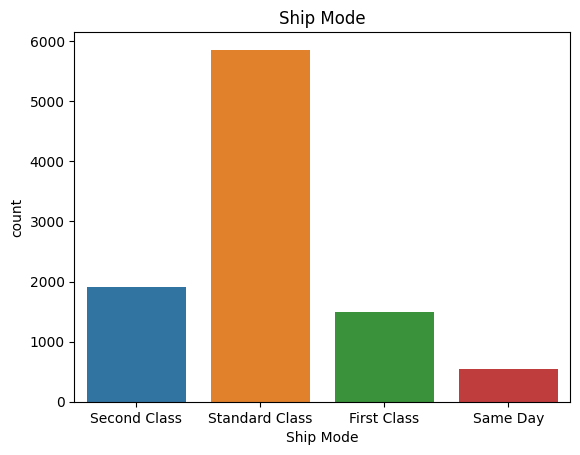

In [27]:
sns.countplot(x='Ship Mode',data=df)
plt.title('Ship Mode')

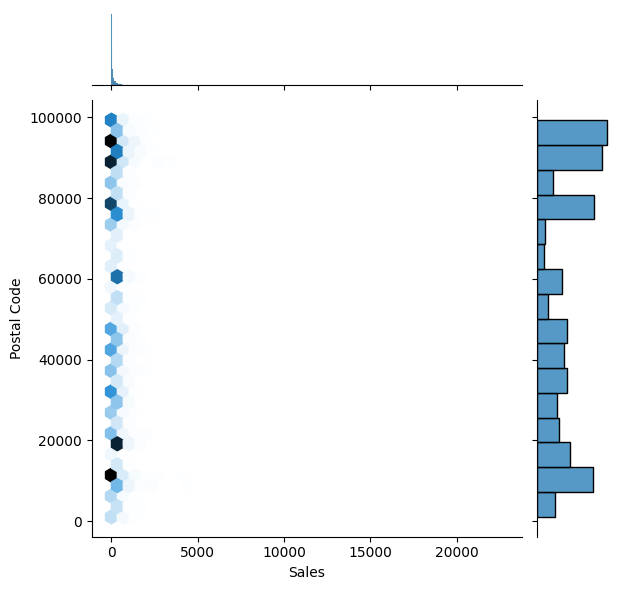

In [32]:
sns.jointplot(x='Sales',y='Postal Code',data=df,kind='hex')


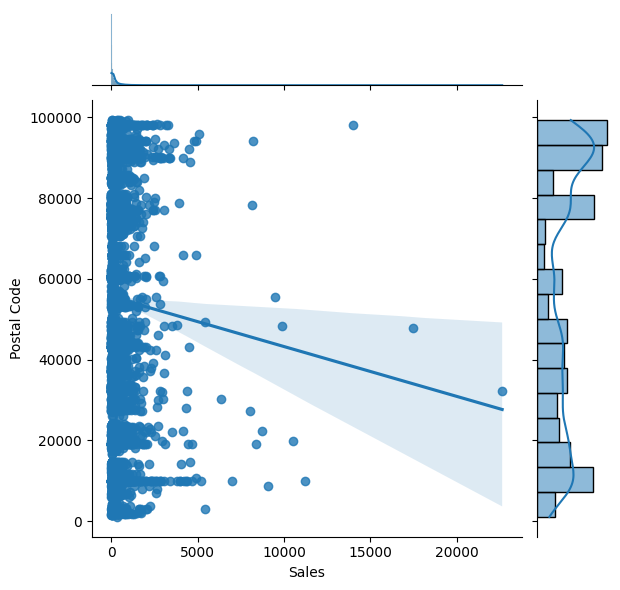

In [33]:
sns.jointplot(x='Sales',y='Postal Code',data=df,kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


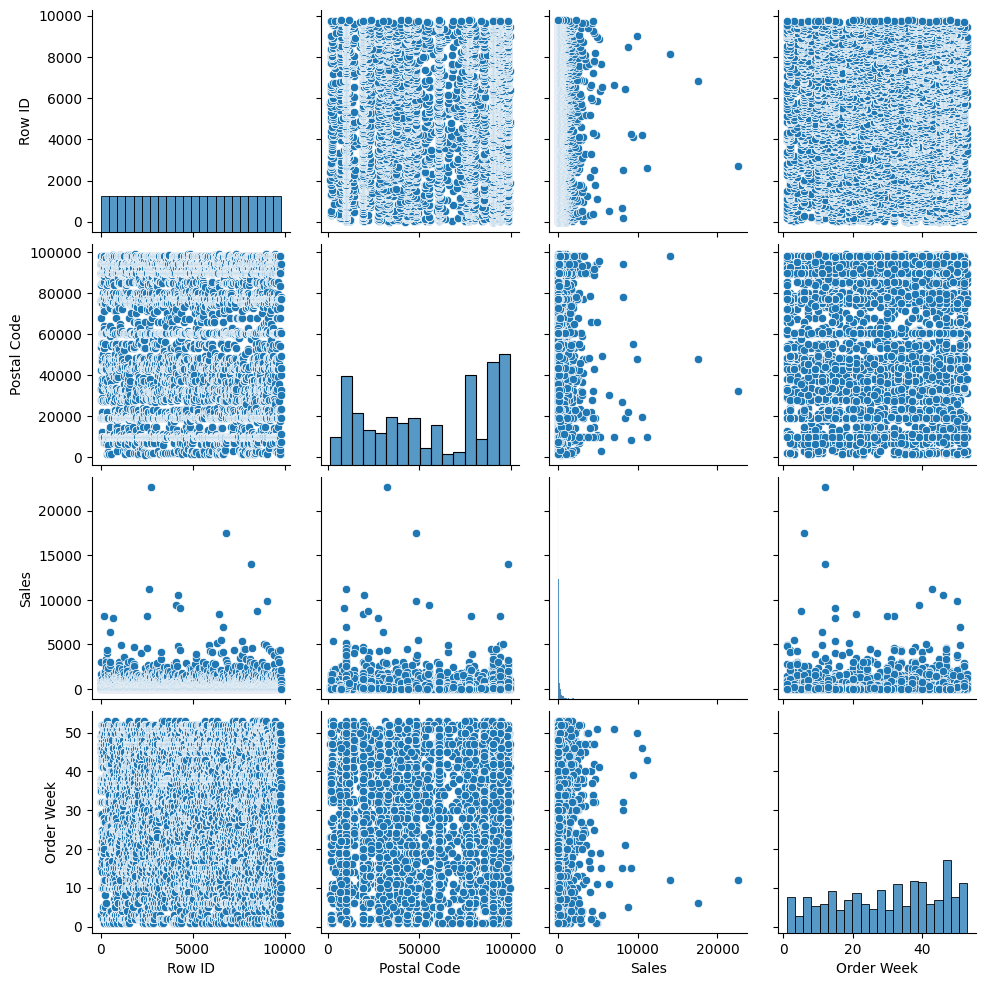

In [34]:
sns.pairplot(df)

TypeError: ignored

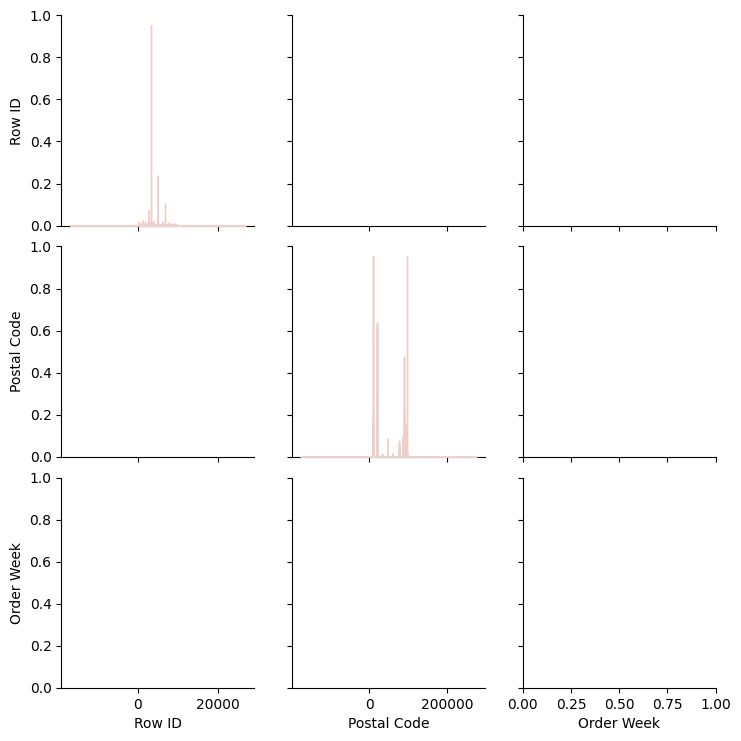

In [35]:
sns.pairplot(df,hue='Sales')